# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

### Data Problem Definition

The task is to develop a predictive model to identify the key factors influencing used car prices. This involves analyzing a dataset containing attributes such as year, manufacturer, model, condition, cylinders, fuel type, transmission, VIN, drive type, vehicle size, and vehicle type. Using techniques such as feature selection and regression analysis, we aim to determine the most significant variables that impact the pricing of used cars. The goal is to transform this business objective into a data-driven solution by leveraging statistical and machine learning methods to build an accurate pricing prediction model.

<span style="color:red; font-size:25px;">DATA EXPLORATION AND PREPARATION</span>

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [83]:
#Import required libraries

import pandas as pd         # For data manipulation and analysis
import numpy as np          # For numerical operations
import matplotlib.pyplot as plt  # For basic plotting
import seaborn as sns       # For advanced data visualization
from sklearn.model_selection import train_test_split, GridSearchCV  # For splitting data into training and test sets
from sklearn.linear_model import LinearRegression Ridge, Lasso# For linear regression model
from sklearn.metrics import mean_squared_error, r2_score  # For evaluating regression models
import statsmodels.api as sm  # For detailed statistical modeling
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [84]:
# Load data
df = pd.read_csv(r'C:\Users\agnek\OneDrive\Documents\Educational_Training Materials\Berkeley Haas\Codio\Module11\Used_Cars_Data.csv')

# Display basic information
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [85]:
# Check for missing values
print(df.isnull().sum())

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64


In [86]:
# Looks like there are a few null values. Let's look at the count of null values by each column
null_count = pd.DataFrame(df.isna().sum(axis = 0),columns=['Nulls'])
null_count['Percentage'] = round(null_count/426880,2)
null_count

,Nulls,Percentage
id,0,0.00
region,0,0.00
price,0,0.00
year,1205,0.00
manufacturer,17646,0.04
model,5277,0.01
condition,174104,0.41
cylinders,177678,0.42
fuel,3013,0.01
odometer,4400,0.01


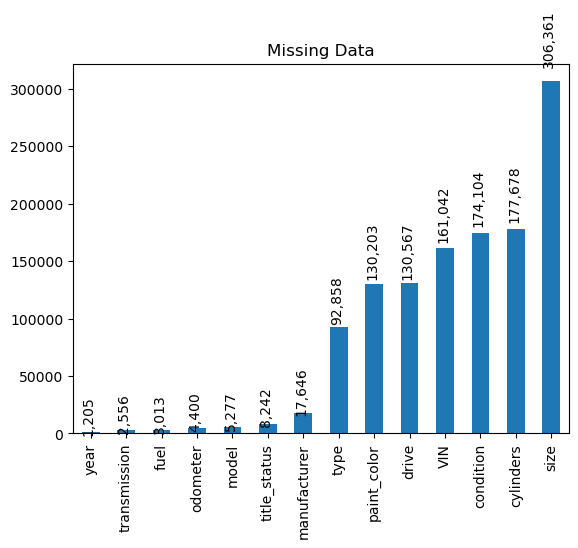

In [87]:
# Plot the missing data

missing = df.isna().sum(axis = 0)
missing = missing[missing > 0]
missing.sort_values(inplace=True)
ax = missing.plot.bar(title='Missing Data')
for p in ax.patches:
    ax.annotate("{:,}".format(int(p.get_height())), (p.get_x() * 1, p.get_height() * 1.05),rotation=90)
plt.show()

In [88]:
# Remove exact duplicate rows
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [89]:
# Define categorical variables to explore
categorical_variables = ['region', 'year', 'manufacturer', 'model',
                         'condition', 'cylinders', 'fuel', 'title_status',
                         'transmission', 'drive', 'size', 'type', 'paint_color', 'state']

# Calculate Value Counts for each categorical variable
for var in categorical_variables:
    print(df[var].value_counts())

columbus                   3608
jacksonville               3562
spokane / coeur d'alene    2988
eugene                     2985
fresno / madera            2983
                           ... 
meridian                     28
southwest MS                 14
kansas city                  11
fort smith, AR                9
west virginia (old)           8
Name: region, Length: 404, dtype: int64
2017.0    36420
2018.0    36369
2015.0    31538
2013.0    30794
2016.0    30434
          ...  
1943.0        1
1915.0        1
1902.0        1
1905.0        1
1909.0        1
Name: year, Length: 114, dtype: int64
ford               70985
chevrolet          55064
toyota             34202
honda              21269
nissan             19067
jeep               19014
ram                18342
gmc                16785
bmw                14699
dodge              13707
mercedes-benz      11817
hyundai            10338
subaru              9495
volkswagen          9345
kia                 8457
lexus              

### Model, type and title status features overview

In [90]:
# Get unique values in column model
unique_values_model = df['model'].unique().tolist()
print(unique_values_model)

[nan, 'sierra 1500 crew cab slt', 'silverado 1500', 'silverado 1500 crew', 'tundra double cab sr', 'f-150 xlt', 'sierra 2500 hd extended cab', 'silverado 1500 double', 'tacoma', 'colorado extended cab', 'corvette grand sport', 'cherokee', 'wrangler unlimited sport', 'silverado 1500 regular', 'colorado crew cab z71', 'tacoma access cab pickup', 'camaro ss coupe 2d', 'tundra crewmax sr5 pickup', 'ranger supercrew xl pickup', 'frontier crew cab pro-4x', 'compass', 'f150 super cab xl pickup 4d', 'tacoma double cab sr5', 'wrangler sport suv 2d', 'f150 supercrew cab xlt', '1500 regular cab tradesman', 'mx-5 miata club', 'ranger supercab xl pickup', 'xt4 sport suv 4d', 'f250 super duty', 'renegade sport suv 4d', 'f150 regular cab xl pickup', 'sierra 1500 regular cab', 'odyssey', '1500 quad cab express pickup', 'sierra 1500 extended cab slt', '1500 classic regular cab', 'mustang gt premium', 'f450', 'silverado 1500 ld', 'tundra double cab pickup', 'wrangler unlimited sahara', 'charger rt 4dr s

In [91]:
# Get unique values in column type
unique_values_type = df['type'].unique().tolist()
print(unique_values_type)

[nan, 'pickup', 'truck', 'other', 'coupe', 'SUV', 'hatchback', 'mini-van', 'sedan', 'offroad', 'bus', 'van', 'convertible', 'wagon']


In [92]:
# Get unique values in column 'title status'
unique_values_title = df['title_status'].unique().tolist()
print(unique_values_title)

[nan, 'clean', 'rebuilt', 'lien', 'salvage', 'missing', 'parts only']


In [93]:
# Since 95% of the cars have a 'clean' status I will remove rows with all other statuses and then drop  the title column 

# Convert 'NaN' string to actual NaN value (if necessary)
df['title_status'].replace('NaN', pd.NA, inplace=True)

# Drop rows with NaN or specific values in 'title_status' column
df = df[~df['title_status'].isin([pd.NA, 'rebuilt', 'lien', 'salvage', 'missing', 'parts only'])]

In [94]:
# Doulecheck the result
# Get unique values in column 'title status'
unique_values_title = df['title_status'].unique().tolist()
print(unique_values_title)

[nan, 'clean']


In [95]:
# Drop rows with NaN in defined set of columns 
df1 = df.dropna(subset=['manufacturer', 'fuel','odometer','transmission','title_status'])

df1.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
27,7316814884,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,3GTP1VEC4EG551563,NaN,NaN,pickup,white,al
28,7316814758,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,1GCSCSE06AZ123805,NaN,NaN,pickup,blue,al
29,7316814989,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,3GCPWCED5LG130317,NaN,NaN,pickup,red,al
30,7316743432,auburn,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,5TFRM5F17HX120972,NaN,NaN,pickup,red,al
31,7316356412,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,NaN,rwd,full-size,truck,black,al


In [96]:
#Drop unnecessary columns
df2 = df1.drop(columns=['id','condition','VIN','cylinders','size','model','drive','title_status'])
df2.tail()

,region,price,year,manufacturer,fuel,odometer,transmission,type,paint_color,state
426875,wyoming,23590,2019.0,nissan,gas,32226.0,other,sedan,NaN,wy
426876,wyoming,30590,2020.0,volvo,gas,12029.0,other,sedan,red,wy
426877,wyoming,34990,2020.0,cadillac,diesel,4174.0,other,hatchback,white,wy
426878,wyoming,28990,2018.0,lexus,gas,30112.0,other,sedan,silver,wy
426879,wyoming,30590,2019.0,bmw,gas,22716.0,other,coupe,NaN,wy


In [97]:
# Count the occurrences of each value in the 'transmission' column
value_counts = df2['transmission'].value_counts()
print(value_counts)

automatic    301965
other         59339
manual        20680
Name: transmission, dtype: int64


In [98]:
# Drop rows with NaN or specific values in 'title_status' column
df2 = df2[~df2['transmission'].isin(['other'])]

In [99]:
# Count the occurrences of each value in the 'transmission' column
value_counts = df2['transmission'].value_counts()
print(value_counts)

automatic    301965
manual        20680
Name: transmission, dtype: int64


In [100]:
df2.describe()

,price,year,odometer
count,3.226450e+05,322645.000000,3.226450e+05
mean,9.123429e+04,2010.572840,1.079825e+05
std,1.400916e+07,9.207021,2.064043e+05
min,0.000000e+00,1900.000000,0.000000e+00
25%,5.000000e+03,2008.000000,5.415200e+04
50%,1.140000e+04,2013.000000,9.917000e+04
75%,2.259000e+04,2016.000000,1.422290e+05
max,3.736929e+09,2022.000000,1.000000e+07


### Summary of Statistics

#### Count:
Price: 3.887450e+05 (or 388,745)

Year: 388745.000000 (or 388,745)

Odometer: 3.887450e+05 (or 388,745)

This represents the total number of entries (vehicles) in the dataset. All three variables have 388,745 entries.

#### Mean:
Price: 8.029137e+04 (or 80,291.37)

Year: 2011.537085

Odometer: 9.640218e+04 (or 96,402.18)

The mean is the average value of each variable. For example, the average price is $80,291.37, the average vehicle year is approximately 2011, and the average odometer reading is 96,402.18 miles.

#### Standard Deviation (std):
Price: 1.276272e+07 (or 12,762,720)

Year: 8.862932

Odometer: 1.945257e+05 (or 194,525.7)

The standard deviation measures the amount of variation or dispersion in the data. A high standard deviation in price (12,762,720) suggests that vehicle prices vary widely. For year, the standard deviation is about 8.86 years, indicating some spread around the average year (2011). The odometer reading also has a high standard deviation, meaning the mileage varies significantly.

#### Minimum (min):
Price: 0.000000e+00 (or 0)

Year: 1900.000000 (or 1900)

Odometer: 0.000000e+00 (or 0)

The minimum value shows the lowest recorded value in each category. Some vehicles have a recorded price of $0, which could indicate missing data or a promotional offer. The earliest vehicle year is 1900, and some vehicles have an odometer reading of 0 miles, which might indicate new or unrecorded mileage.
#### Need to investigate odometer readings further and apply some cleaning

#### 5. 25th Percentile (25%):
Price: 5.995000e+03 (or 5,995)

Year: 2008.000000

Odometer: 3.772500e+04 (or 37,725)

The 25th percentile indicates that 25% of the vehicles have a price below $5,995, a year below 2008, and an odometer reading below 37,725 miles.

#### Median (50%):
Price: 1.399900e+04 (or 13,999)

Year: 2014.000000

Odometer: 8.598900e+04 (or 85,989)

The median is the middle value when all the data points are arranged in order. Half of the vehicles are priced below $13,999, have a year below 2014, and an odometer reading below 85,989 miles.

#### 75th Percentile (75%):
Price: 2.698000e+04 (or 26,980)

Year: 2017.000000

Odometer: 1.335000e+05 (or 133,500)

The 75th percentile shows that 75% of the vehicles have a price below $26,980, a year below 2017, and an odometer reading below 133,500 miles.

#### Maximum (max):
Price: 3.736929e+09 (or 3,736,929,000)

Year: 2022.000000

Odometer: 1.000000e+07 (or 10,000,000)

The maximum value shows the highest recorded value in each category. There’s an exceptionally high price of $3.73 billion, which may indicate an outlier or data entry error. The newest vehicle year is 2022, and the highest odometer reading is 10,000,000 miles, which is likely an error or a very unusual case.
#### Need to apply filters on price and odometer 

In [101]:
# Count infinity values in column 'price'
inf_count = np.isinf(df2['price']).sum()

print("Number of infinity values in column 'price':", inf_count)

# Count negative infinity values in column 'price'
neg_inf_count = (df2['price'] == -np.inf).sum()

print("Number of negative infinity values in column 'price':", neg_inf_count)

# Count infinity values in column 'A'
inf_count = np.isinf(df2['odometer']).sum()

print("Number of infinity values in column 'odometer':", inf_count)

# Count negative infinity values in column 'A'
neg_inf_count = (df2['odometer'] == -np.inf).sum()

print("Number of negative infinity values in column 'odometer':", neg_inf_count)

Number of infinity values in column 'price': 0
Number of negative infinity values in column 'price': 0
Number of infinity values in column 'odometer': 0
Number of negative infinity values in column 'odometer': 0


In [102]:
# Replace infinity values with NaN
### df2.replace([float('inf'), -float('inf')], pd.NA, inplace=True)

# Then handle NaNs as described above
### df2 = df2.dropna()

### Code Review

#### replace([float('inf'), -float('inf')], pd.NA, inplace=True):

#### replace(): 
This method is used to replace specified values in the DataFrame with other values.

#### [float('inf'), -float('inf')]: 
This list specifies the values to be replaced. Here, float('inf') represents positive infinity and -float('inf') represents negative infinity.

#### pd.NA: 
This is the new value to replace the specified infinite values. pd.NA is a special value in pandas representing missing values (introduced in pandas version 1.0).

#### inplace=True: 
This parameter means that the changes will be made directly to df2, modifying the original DataFrame, rather than creating a new DataFrame with the changes.

### What It Does:
Purpose: 
This code replaces all occurrences of positive and negative infinity in the DataFrame df2 with missing values (pd.NA).

Why: 
Handling infinity values is important because they can cause issues in data analysis and modeling. Replacing them with missing values (pd.NA) makes it easier to perform further analysis or imputation.

### Price


Upper boundary to exclude top 5% of values: 68367.0

Filtered DataFrame:
               price           year      odometer
count  283679.000000  283679.000000  2.836790e+05
mean    16972.984345    2010.109102  1.107216e+05
std     13170.575680       9.338478  1.836375e+05
min       501.000000    1900.000000  0.000000e+00
25%      6980.000000    2007.000000  5.965550e+04
50%     12998.000000    2012.000000  1.028500e+05
75%     23995.000000    2016.000000  1.460000e+05
max     68367.000000    2022.000000  1.000000e+07


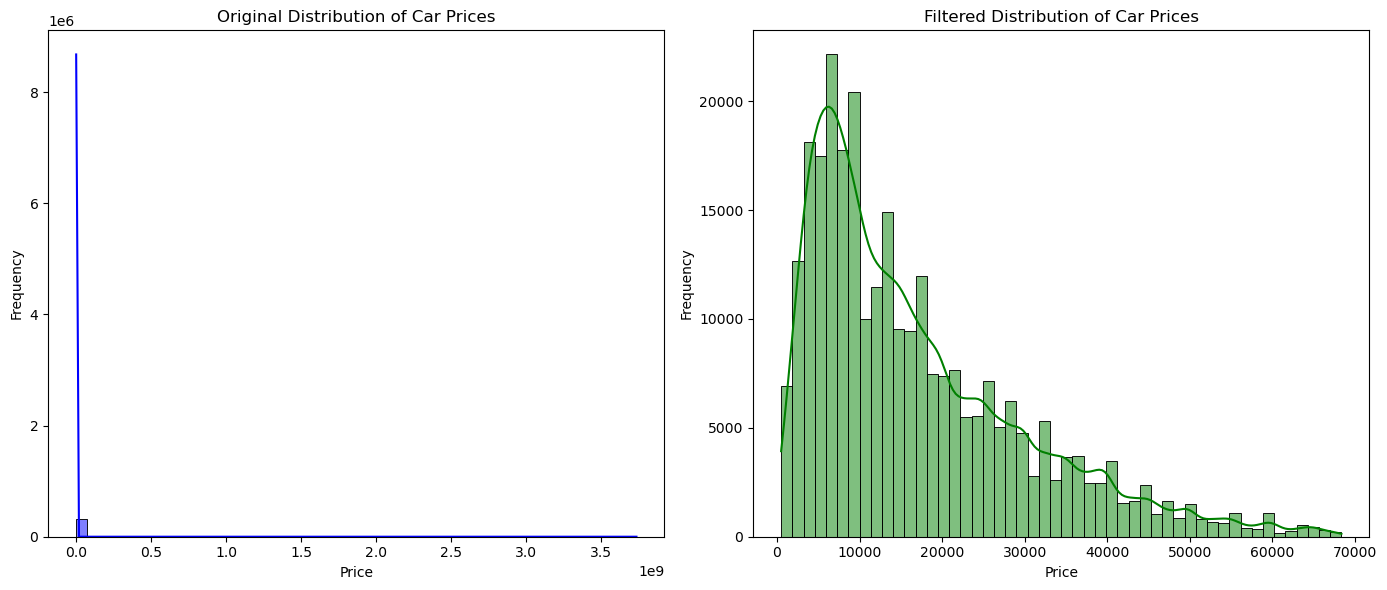

In [103]:
# Define the lower and upper boundaries
lower_boundary = 500
upper_boundary = df2['price'].quantile(0.99)

print(f"\nUpper boundary to exclude top 5% of values: {upper_boundary}")

# Filter the DataFrame to include prices between the lower and upper boundaries
df3 = df2[(df2['price'] > lower_boundary) & (df2['price'] <= upper_boundary)]

print("\nFiltered DataFrame:")
print(df3.describe())


plt.figure(figsize=(14, 6))

# Original data
plt.subplot(1, 2, 1)
sns.histplot(df2['price'], bins=50, kde=True, color='blue')
plt.title('Original Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Filtered data
plt.subplot(1, 2, 2)
sns.histplot(df3['price'], bins=50, kde=True, color='green')
plt.title('Filtered Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

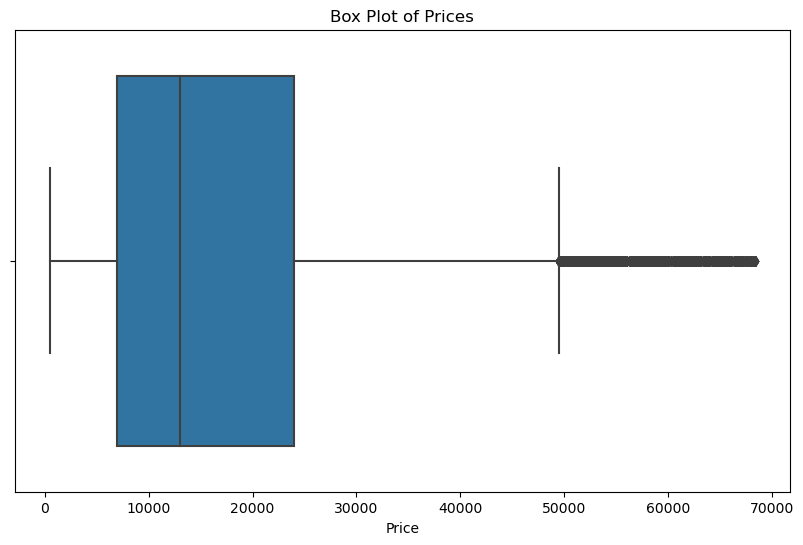

In [104]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df3['price'])
plt.title('Box Plot of Prices')
plt.xlabel('Price')
plt.show()

### Odometer

In [105]:
od_lower_boundary = 100
od_upper_boundary = df3['odometer'].quantile(0.99)

# Filter the DataFrame to include odometer values between the lower and upper boundaries
df4 = df3[(df3['odometer'] > od_lower_boundary) & (df3['odometer'] <= od_upper_boundary)]

print("\nFiltered DataFrame:")
print(df4.describe())



Filtered DataFrame:
               price           year       odometer
count  277737.000000  277737.000000  277737.000000
mean    17028.049957    2010.258522  105333.005239
std     13140.678783       9.037495   57798.595274
min       501.000000    1900.000000     101.000000
25%      6995.000000    2007.000000   60810.000000
50%     12999.000000    2012.000000  102958.000000
75%     23995.000000    2016.000000  145000.000000
max     68367.000000    2022.000000  277730.000000


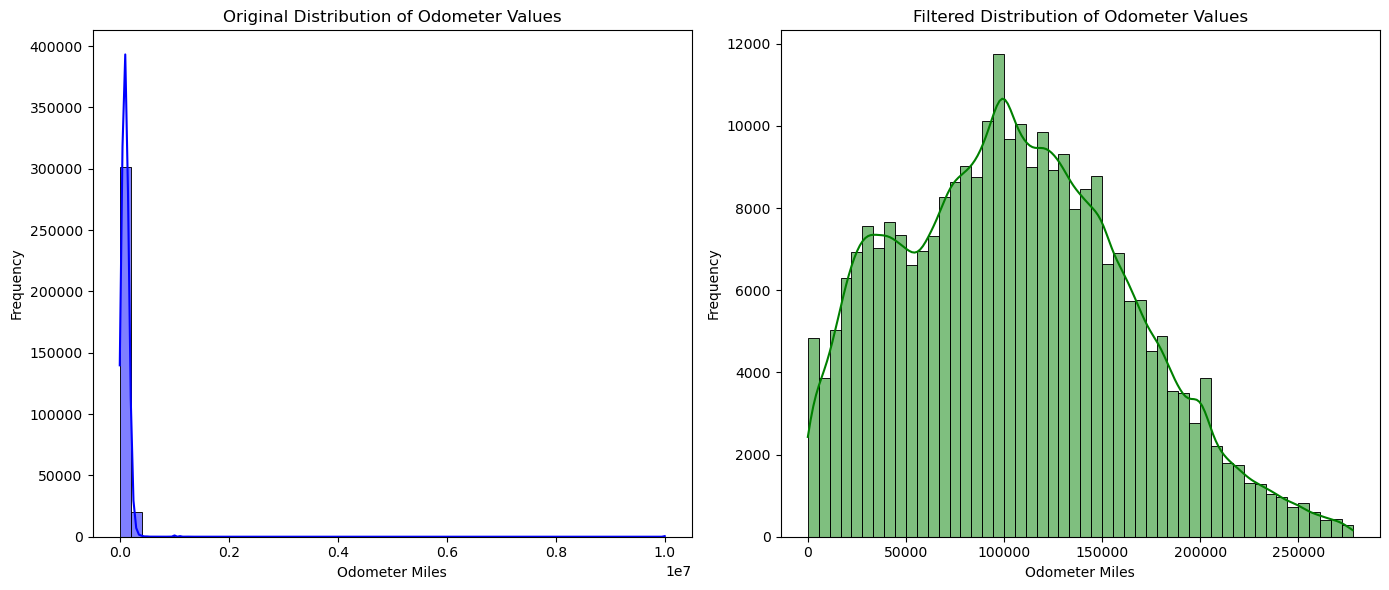

In [106]:

plt.figure(figsize=(14, 6))



# Original data
plt.subplot(1, 2, 1)
sns.histplot(df2['odometer'], bins=50, kde=True, color='blue')
plt.title('Original Distribution of Odometer Values')
plt.xlabel('Odometer Miles')
plt.ylabel('Frequency')

# Filtered data
plt.subplot(1, 2, 2)
sns.histplot(df4['odometer'], bins=50, kde=True, color='green')
plt.title('Filtered Distribution of Odometer Values')
plt.xlabel('Odometer Miles')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [107]:
# Calculate correlation between 'price' and 'odometer'
correlation = df4['price'].corr(df4['odometer'])

print(f"Correlation between price and odometer: {correlation}")

Correlation between price and odometer: -0.5137734460862758


### Conclusion:

A correlation of -0.51 between odometer and price is likely to be both practically and statistically significant. It indicates a moderate, meaningful relationship where an increase in mileage is associated with a decrease in price. This correlation would be considered important when analyzing factors that affect vehicle pricing.

### Regions

Objective here is to investigate if the average price of the used car in significantly differ by region. 

Counts by Region:
columbus                   2584
grand rapids               2466
spokane / coeur d'alene    2301
boise                      2296
south jersey               2294
                           ... 
meridian                     11
southwest MS                 10
kansas city                   8
fort smith, AR                7
west virginia (old)           6
Name: region, Length: 404, dtype: int64


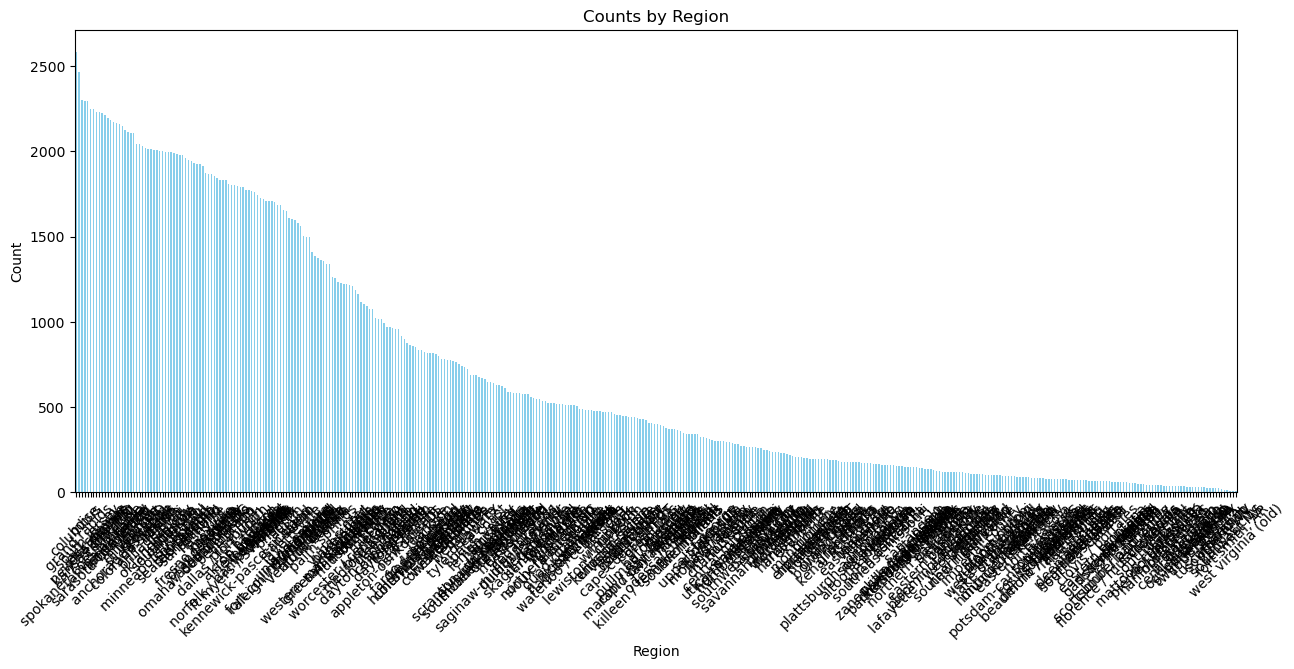

In [108]:
# Group by the 'category' column and get the counts
counts_region = df4['region'].value_counts()

print("Counts by Region:")
print(counts_region)

# Manipulating the plot length and width
plt.figure(figsize=(15, 6))  # Width: 10 inches, Height: 6 inches

# Plot the counts using a bar plot
counts_region.plot(kind='bar', color='skyblue')
plt.title('Counts by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()

#### 404 regions

In [109]:
# Get a list of all unique values in 'manufacturer' column
unique_values_list = df4['manufacturer'].unique().tolist()

# Display the result
print(unique_values_list)

['ford', 'toyota', 'jeep', 'honda', 'chevrolet', 'chrysler', 'subaru', 'volvo', 'mercedes-benz', 'lincoln', 'audi', 'buick', 'acura', 'infiniti', 'bmw', 'volkswagen', 'mazda', 'porsche', 'lexus', 'nissan', 'kia', 'dodge', 'gmc', 'hyundai', 'cadillac', 'ram', 'rover', 'mini', 'pontiac', 'mitsubishi', 'fiat', 'jaguar', 'tesla', 'mercury', 'alfa-romeo', 'saturn', 'harley-davidson', 'datsun', 'aston-martin', 'land rover', 'ferrari', 'morgan']


To see if price by region differs I will group the list of manufacturers into bins according to their normal average price and name those groups.We can create several price categories (bins) and assign each manufacturer to a bin based on their typical average price. 

#### Price Categories (Bins)

Economy: Budget-friendly brands with generally lower average prices.

Mid-Range: Brands with moderate pricing, offering a balance of affordability and quality.

Luxury: High-end brands known for premium pricing and high-quality features.

Ultra-Luxury: Exclusive brands with very high average prices, often associated with luxury and prestige.

### Grouping the Manufacturers

#### Economy:

chevrolet, ford, jeep, nissan, mazda, honda, dodge, buick, hyundai, kia, subaru, mitsubishi, volkswagen, fiat

#### Mid-Range:

gmc, toyota, ram, chrysler, volvo, lincoln, acura, mini, pontiac

#### Luxury:

cadillac, lexus, jaguar, audi, infiniti, mercedes-benz, bmw, rover, tesla, land rover

#### Ultra-Luxury:

aston-martin, ferrari, morgan, porsche

In [110]:
#Place manufacturers into bins 
manufacturers_bins = {
    'Economy': ['chevrolet', 'ford', 'jeep', 'nissan', 'mazda', 'honda', 'dodge', 'buick', 'hyundai', 'kia', 'subaru', 'mitsubishi', 'volkswagen', 'fiat'],
    'Mid-Range': ['gmc', 'toyota', 'ram', 'chrysler', 'volvo', 'lincoln', 'acura', 'mini', 'pontiac'],
    'Luxury': ['cadillac', 'lexus', 'jaguar', 'audi', 'infiniti', 'mercedes-benz', 'bmw', 'rover', 'tesla', 'land rover','datsun'],
    'Ultra-Luxury': ['aston-martin', 'ferrari', 'morgan', 'porsche']
}

# Display the grouped manufacturers
for category, brands in manufacturers_bins.items():
    print(f"{category}: {', '.join(brands)}")

Economy: chevrolet, ford, jeep, nissan, mazda, honda, dodge, buick, hyundai, kia, subaru, mitsubishi, volkswagen, fiat
Mid-Range: gmc, toyota, ram, chrysler, volvo, lincoln, acura, mini, pontiac
Luxury: cadillac, lexus, jaguar, audi, infiniti, mercedes-benz, bmw, rover, tesla, land rover, datsun
Ultra-Luxury: aston-martin, ferrari, morgan, porsche


In [111]:
# Reverse the dictionary for easy lookup
bin_lookup = {manufacturer: bin_name for bin_name, manufacturers in manufacturers_bins.items() for manufacturer in manufacturers}

# Add the 'bins' column by mapping the manufacturers to their respective bins
df4['bins'] = df4['manufacturer'].map(bin_lookup)

# Display the DataFrame
print(df4)
df4.head()

         region  price    year   manufacturer    fuel  odometer transmission  \
31       auburn  15000  2013.0           ford     gas  128000.0    automatic   
34       auburn  35000  2019.0         toyota     gas   43000.0    automatic   
37       auburn   4500  1992.0           jeep     gas  192000.0    automatic   
55       auburn  19900  2004.0           ford  diesel   88000.0    automatic   
59       auburn  14000  2012.0          honda     gas   95000.0    automatic   
...         ...    ...     ...            ...     ...       ...          ...   
426860  wyoming  39990  2017.0       infiniti     gas   41664.0    automatic   
426864  wyoming  29590  2016.0         toyota     gas   53475.0    automatic   
426866  wyoming  32990  2016.0       infiniti     gas   55612.0    automatic   
426873  wyoming  30990  2018.0  mercedes-benz     gas   15080.0    automatic   
426874  wyoming  33590  2018.0          lexus     gas   30814.0    automatic   

            type paint_color state     

C:\Users\agnek\AppData\Local\Temp\ipykernel_19540\275152523.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['bins'] = df4['manufacturer'].map(bin_lookup)


,region,price,year,manufacturer,fuel,odometer,transmission,type,paint_color,state,bins
31,auburn,15000,2013.0,ford,gas,128000.0,automatic,truck,black,al,Economy
34,auburn,35000,2019.0,toyota,gas,43000.0,automatic,truck,grey,al,Mid-Range
37,auburn,4500,1992.0,jeep,gas,192000.0,automatic,NaN,NaN,al,Economy
55,auburn,19900,2004.0,ford,diesel,88000.0,automatic,pickup,blue,al,Economy
59,auburn,14000,2012.0,honda,gas,95000.0,automatic,mini-van,silver,al,Economy


### Economy Class Investigation

In [112]:
# Set price floor and cap for 'Economy' bin to eliminate extreem outliers in this class
#df5.loc[df5['bins'] == 'Economy', 'price'] = df5.loc[df5['bins'] == 'Economy', 'price'].clip(lower=100, upper=50000)

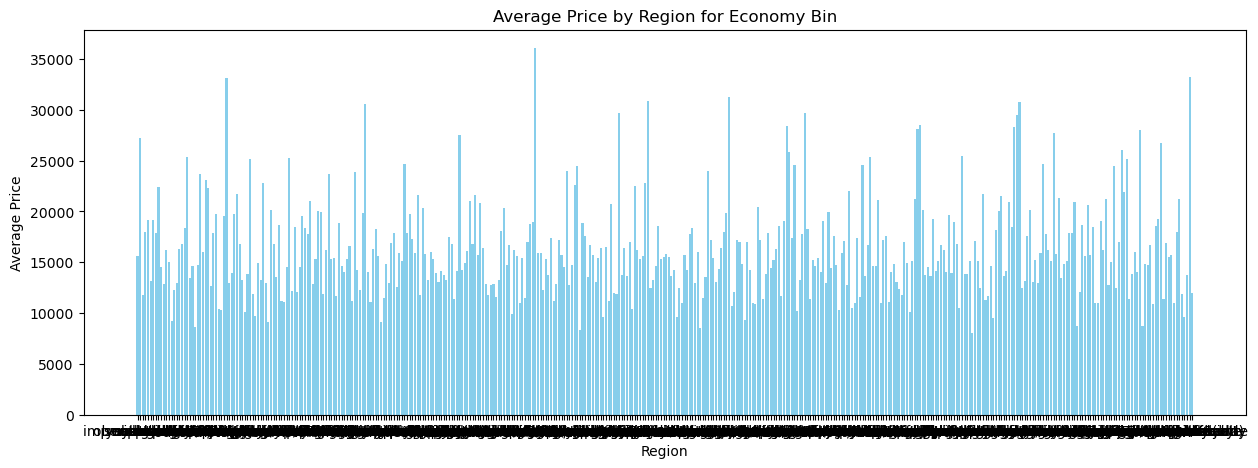

In [113]:
# Filter data on a specific bin (e.g., 'medium')
economy = df4[df4['bins'] == 'Economy']

# Group by region and calculate average price
grouped_economy = economy.groupby('region')['price'].mean().reset_index()
grouped_df = grouped_economy.sort_values(by='price', ascending=False)

# Plot the average price by region
plt.figure(figsize=(15, 5))
plt.bar(grouped_df['region'], grouped_economy['price'], color='skyblue')
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price by Region for Economy Bin')
plt.show()

In [114]:
# Look at top values for Economy class after applying the filter

economy_sorted = economy.sort_values(by='price', ascending=False)
economy_sorted.head()

,region,price,year,manufacturer,fuel,odometer,transmission,type,paint_color,state,bins
19567,little rock,68367,2020.0,chevrolet,diesel,22670.0,automatic,pickup,black,ar,Economy
221865,springfield,68367,2020.0,chevrolet,diesel,22670.0,automatic,pickup,black,mo,Economy
168267,topeka,68367,2020.0,chevrolet,diesel,22670.0,automatic,pickup,black,ks,Economy
148150,"st louis, MO",68367,2020.0,chevrolet,diesel,22670.0,automatic,pickup,black,il,Economy
17457,fayetteville,68367,2020.0,chevrolet,diesel,22670.0,automatic,pickup,black,ar,Economy


### Mid-Range Investigation

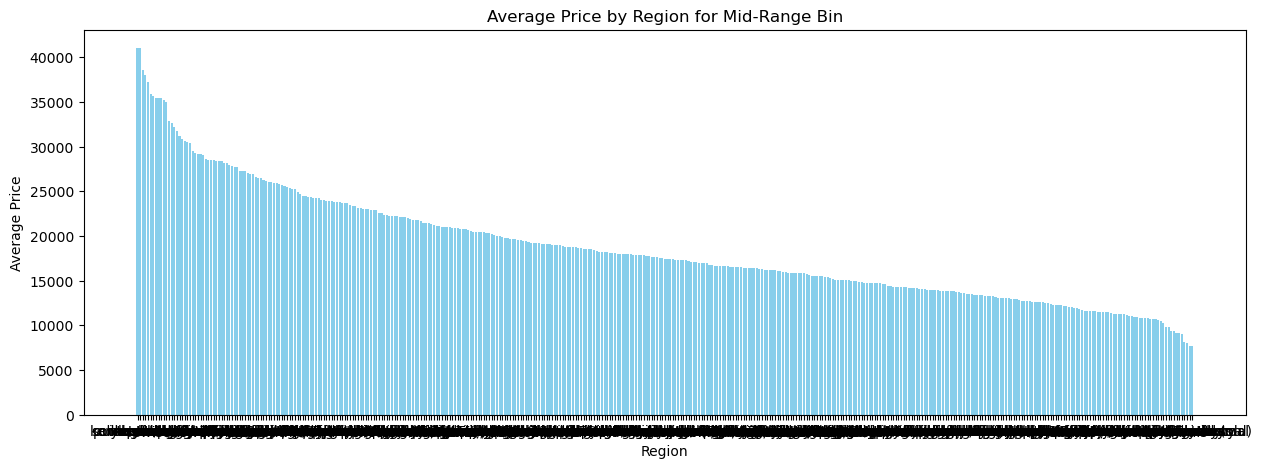

In [115]:
# Filter data on a Mid-Range bin
mid_range = df4[df4['bins'] == 'Mid-Range']

# Group by region and calculate average price
grouped_mid = mid_range.groupby('region')['price'].mean().reset_index()
grouped_df_mid = grouped_mid.sort_values(by='price', ascending=False)

# Plot the average price by region
plt.figure(figsize=(15, 5))
plt.bar(grouped_df_mid['region'], grouped_df_mid['price'], color='skyblue')
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price by Region for Mid-Range Bin')
plt.show()

In [116]:
# Look at top values for mid-range class after applying the filter

mid_sorted = mid_range.sort_values(by='price', ascending=False)
mid_sorted.head()

,region,price,year,manufacturer,fuel,odometer,transmission,type,paint_color,state,bins
305123,oklahoma city,68285,2019.0,lincoln,gas,43469.0,automatic,NaN,black,ok,Mid-Range
29155,humboldt county,68000,2015.0,gmc,gas,45633.0,automatic,truck,NaN,ca,Mid-Range
164579,"kansas city, MO",68000,2019.0,ram,diesel,28000.0,automatic,truck,white,ks,Mid-Range
177888,maine,68000,2020.0,gmc,gas,15986.0,automatic,SUV,grey,me,Mid-Range
137186,spokane / coeur d'alene,67999,2017.0,gmc,diesel,50501.0,automatic,truck,grey,id,Mid-Range


### Luxury Investigation

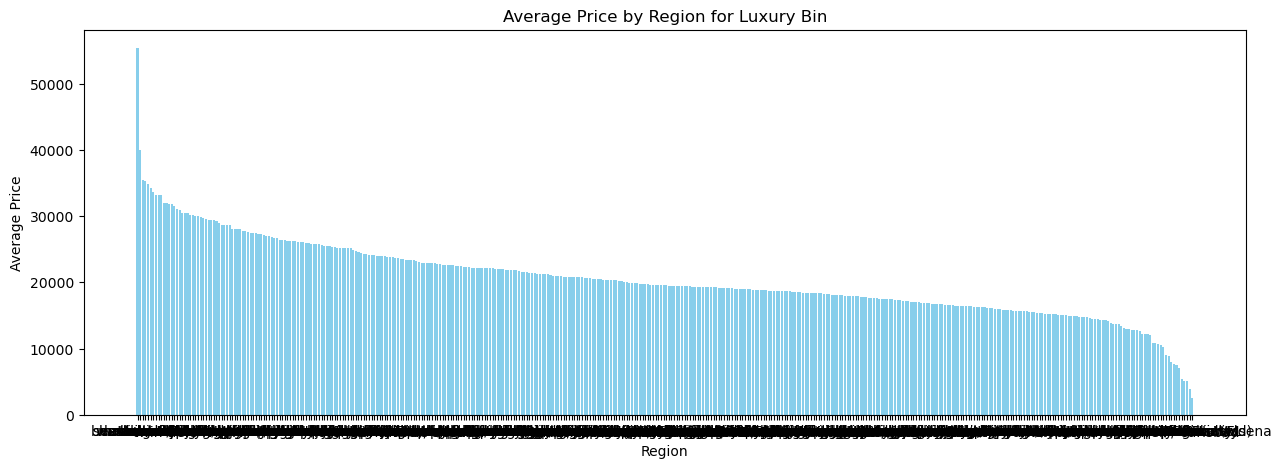

In [117]:
# Filter data on a Luxury bin 
luxury = df4[df4['bins'] == 'Luxury']

# Group by region and calculate average price
grouped_lux = luxury.groupby('region')['price'].mean().reset_index()
grouped_df_lux = grouped_lux.sort_values(by='price', ascending=False)

# Plot the average price by region
plt.figure(figsize=(15, 5))
plt.bar(grouped_df_lux['region'], grouped_df_lux['price'], color='skyblue')
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price by Region for Luxury Bin')
plt.show()

In [118]:
# Look at top values for mid-range class after applying the filter

lux_sorted = luxury.sort_values(by='price', ascending=False)
lux_sorted.head()

,region,price,year,manufacturer,fuel,odometer,transmission,type,paint_color,state,bins
40741,monterey bay,68358,2020.0,cadillac,gas,23824.0,automatic,NaN,black,ca,Luxury
425491,sheboygan,68297,2020.0,cadillac,gas,26481.0,automatic,SUV,blue,wi,Luxury
251667,central NJ,68000,2017.0,rover,gas,22000.0,automatic,SUV,black,nj,Luxury
198105,detroit metro,67995,2019.0,rover,gas,34306.0,automatic,NaN,red,mi,Luxury
267612,buffalo,67995,2017.0,rover,gas,35089.0,automatic,SUV,black,ny,Luxury


### Ultra Luxury

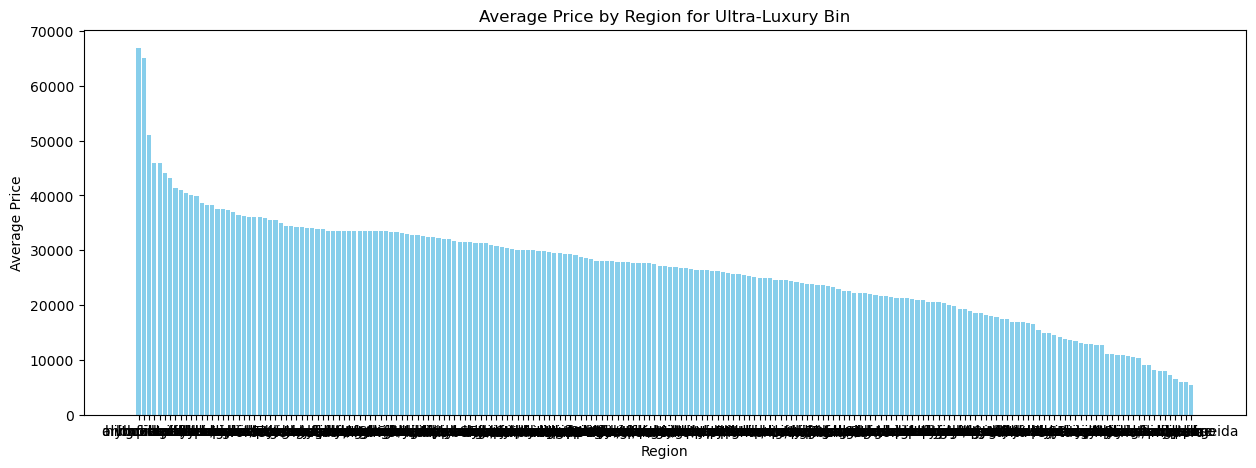

In [119]:
# Filter data on a Ultra Luxury bin 
ultra= df4[df4['bins'] == 'Ultra-Luxury']

# Group by region and calculate average price
grouped_ultra = ultra.groupby('region')['price'].mean().reset_index()
grouped_df_ult = grouped_ultra.sort_values(by='price', ascending=False)

# Plot the average price by region
plt.figure(figsize=(15, 5))
plt.bar(grouped_df_ult['region'], grouped_df_ult['price'], color='skyblue')
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price by Region for Ultra-Luxury Bin')
plt.show()

In [120]:
# Look at top values for mid-range class after applying the filter

ultra_sorted = ultra.sort_values(by='price', ascending=False)
ultra_sorted.head()

,region,price,year,manufacturer,fuel,odometer,transmission,type,paint_color,state,bins
112532,south florida,67991,2017.0,porsche,gas,30181.0,automatic,sedan,NaN,fl,Ultra-Luxury
127862,hawaii,67495,2016.0,porsche,gas,15700.0,automatic,coupe,red,hi,Ultra-Luxury
322701,portland,67000,2001.0,porsche,gas,24500.0,manual,NaN,yellow,or,Ultra-Luxury
60990,SF bay area,66992,2019.0,porsche,gas,23280.0,automatic,SUV,white,ca,Ultra-Luxury
170105,wichita,66900,2020.0,porsche,gas,14878.0,automatic,SUV,white,ks,Ultra-Luxury


In [121]:
df4.describe()

,price,year,odometer
count,277737.000000,277737.000000,277737.000000
mean,17028.049957,2010.258522,105333.005239
std,13140.678783,9.037495,57798.595274
min,501.000000,1900.000000,101.000000
25%,6995.000000,2007.000000,60810.000000
50%,12999.000000,2012.000000,102958.000000
75%,23995.000000,2016.000000,145000.000000
max,68367.000000,2022.000000,277730.000000


### State

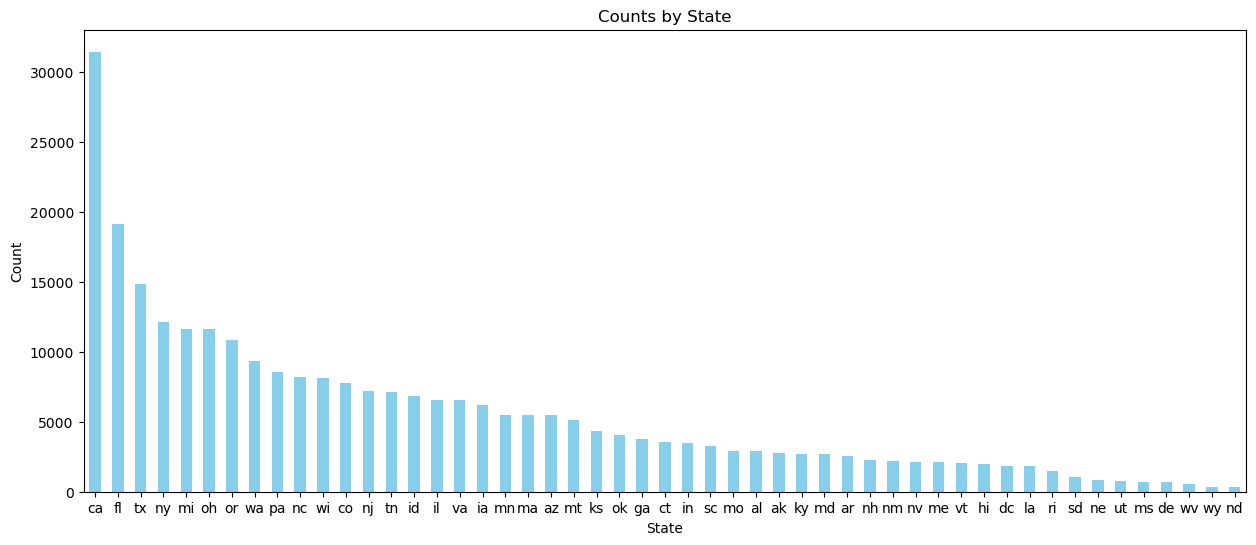

In [122]:
# Group by State and calculate counts
state_counts = df4['state'].value_counts()

# Manipulating the plot length and width
plt.figure(figsize=(15, 6))  # Width: 10 inches, Height: 6 inches

# Plot the counts using a bar plot
state_counts.plot(kind='bar', color='skyblue')
plt.title('Counts by State')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

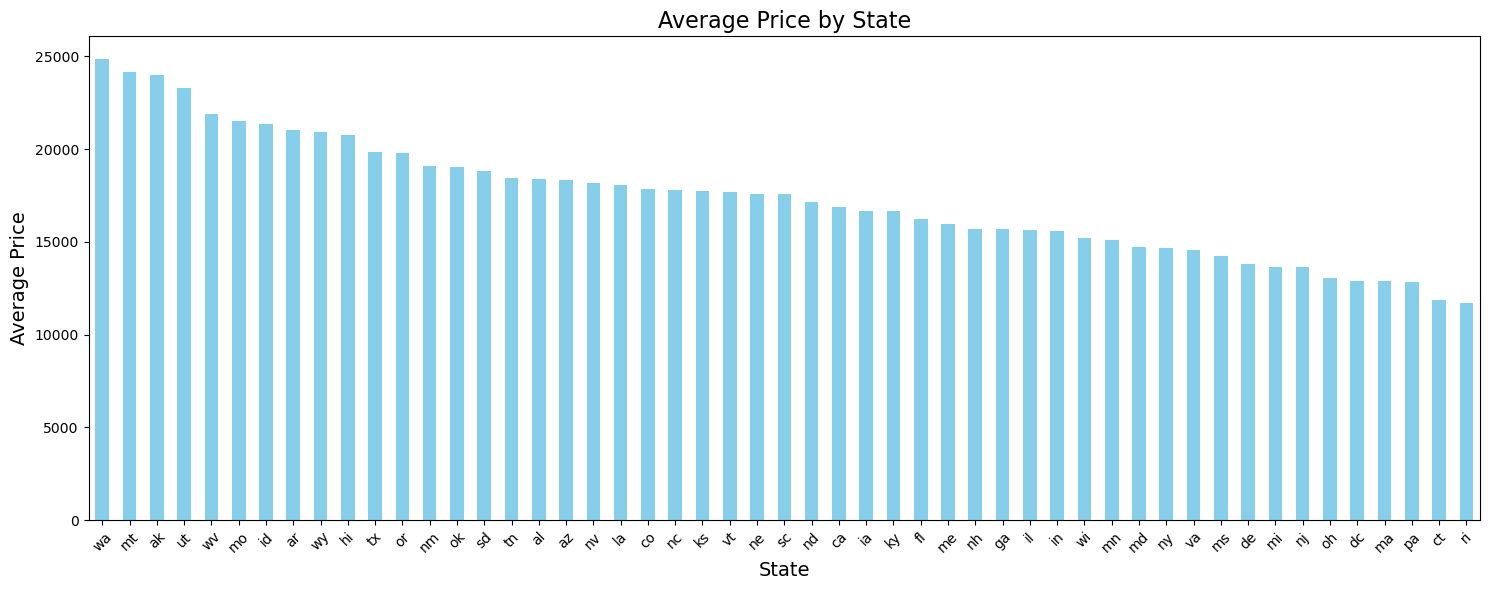

In [123]:
# Calculate average price per state
avg_price_by_state = df4.groupby('state')['price'].mean().sort_values(ascending=False)

# Set up the figure with the specified size
plt.figure(figsize=(15, 6))

# Plotting
avg_price_by_state.plot(kind='bar', color='skyblue')

# Customizing the plot
plt.title('Average Price by State', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Average Price', fontsize=14)
plt.xticks(rotation=45)  # Rotate x labels if needed for better readability
plt.tight_layout()  # Adjust layout to prevent clipping

# Show the plot
plt.show()

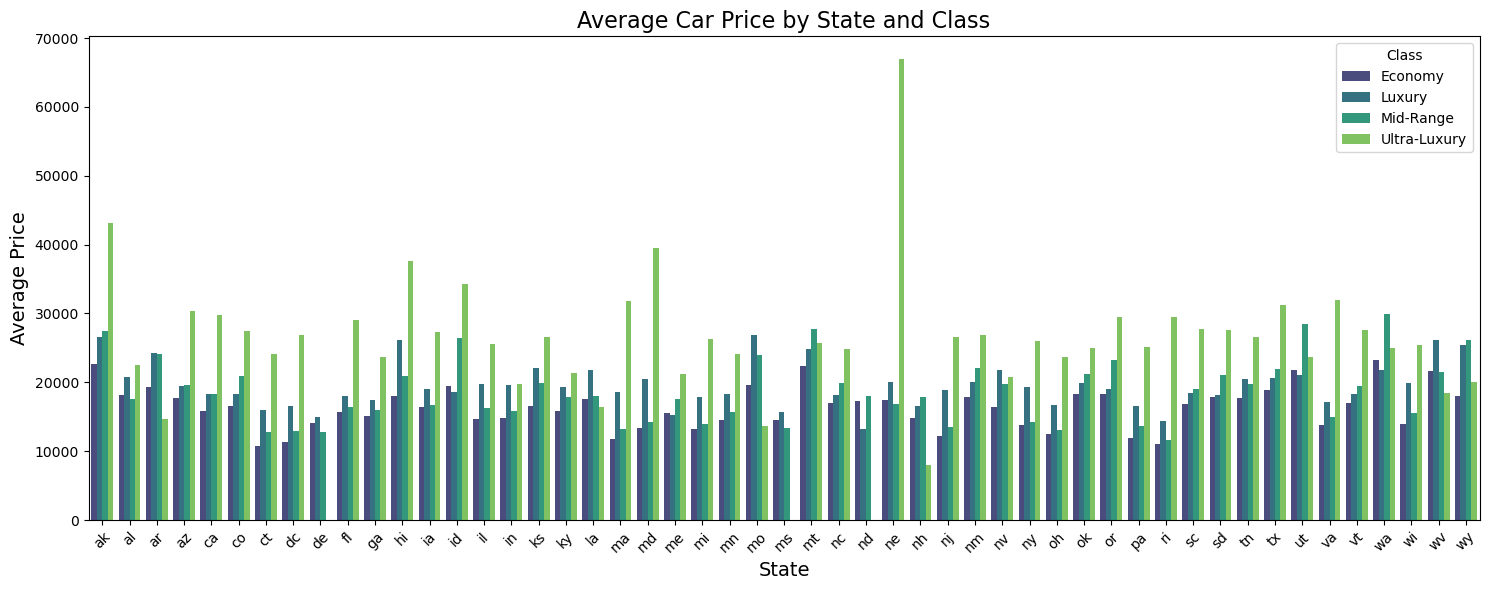

In [124]:
df4_grouped = df4.groupby(['state', 'bins'])['price'].mean().reset_index()

# Assuming df4 is already defined and contains the relevant columns
plt.figure(figsize=(15, 6))

# Plotting
sns.barplot(x='state', y='price', hue='bins', data=df4_grouped, palette='viridis')

# Customizing the plot
plt.title('Average Car Price by State and Class', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Average Price', fontsize=14)
plt.legend(title='Class')
plt.xticks(rotation=45)  # Optional: Rotate x labels for better readability if needed
plt.tight_layout()  # Adjust layout to fit labels and titles

# Show the plot
plt.show()

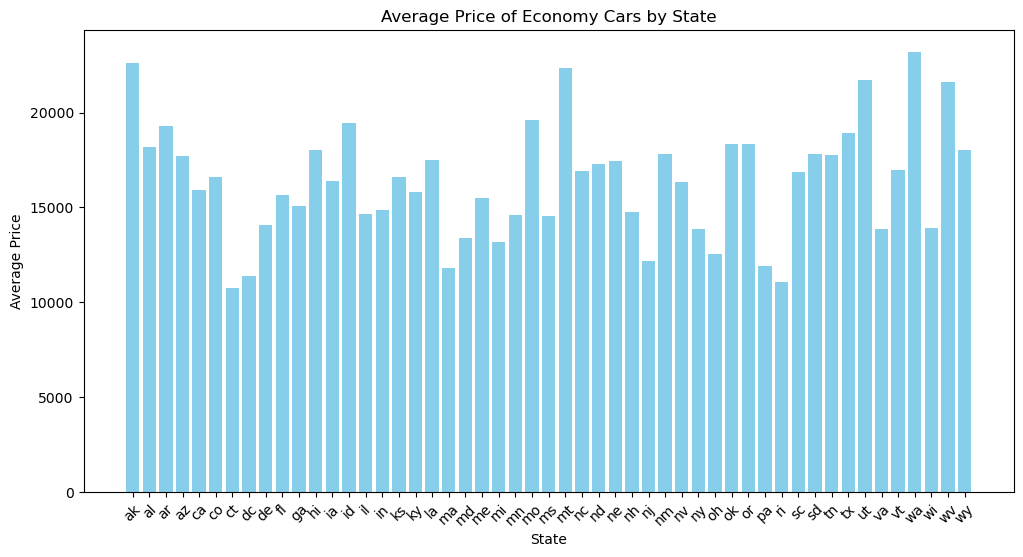

In [125]:
# Filter out rows where 'bins' is 'Luxury'
state_economy = df4[df4['bins'] == 'Economy']

# Group by 'state' and calculate the average price
econ_avg_price = state_economy.groupby('state')['price'].mean().reset_index()

# Plot the bar plot
plt.figure(figsize=(12, 6))
plt.bar(econ_avg_price['state'], econ_avg_price['price'], color='skyblue')
plt.xlabel('State')
plt.ylabel('Average Price')
plt.title('Average Price of Economy Cars by State')
plt.xticks(rotation=45)
plt.show()

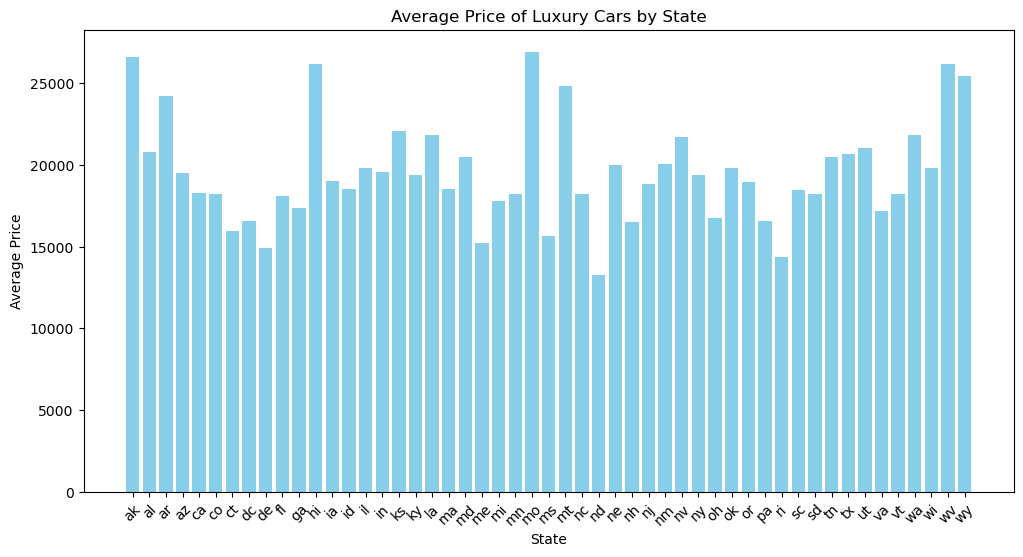

In [126]:
# Filter out rows where 'bins' is 'Luxury'
state_luxury = df4[df4['bins'] == 'Luxury']

# Group by 'state' and calculate the average price
luxury_avg_price = state_luxury.groupby('state')['price'].mean().reset_index()

# Plot the bar plot
plt.figure(figsize=(12, 6))
plt.bar(luxury_avg_price['state'], luxury_avg_price['price'], color='skyblue')
plt.xlabel('State')
plt.ylabel('Average Price')
plt.title('Average Price of Luxury Cars by State')
plt.xticks(rotation=45)
plt.show()

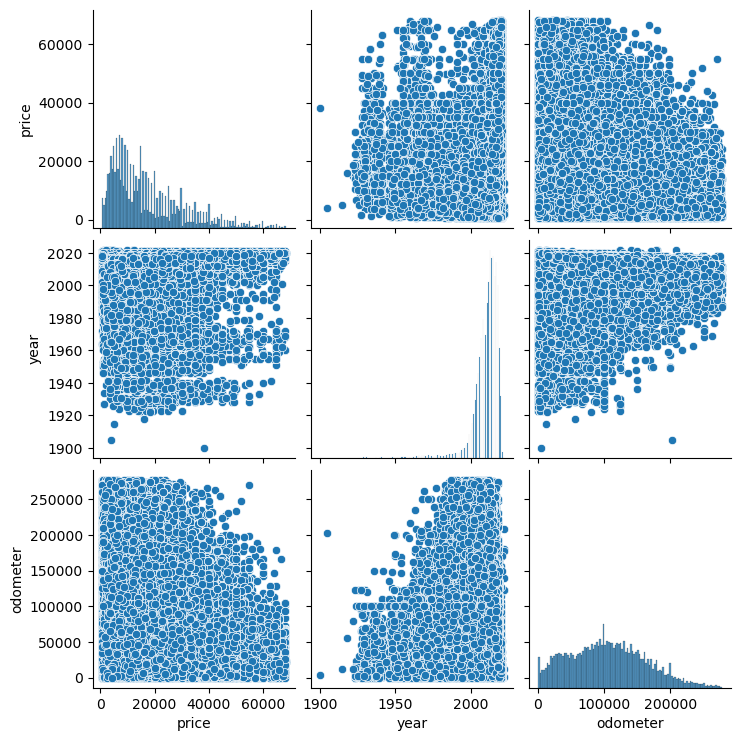

In [127]:
# Pairplot to visualize relationships
sns.pairplot(df4)
plt.show()


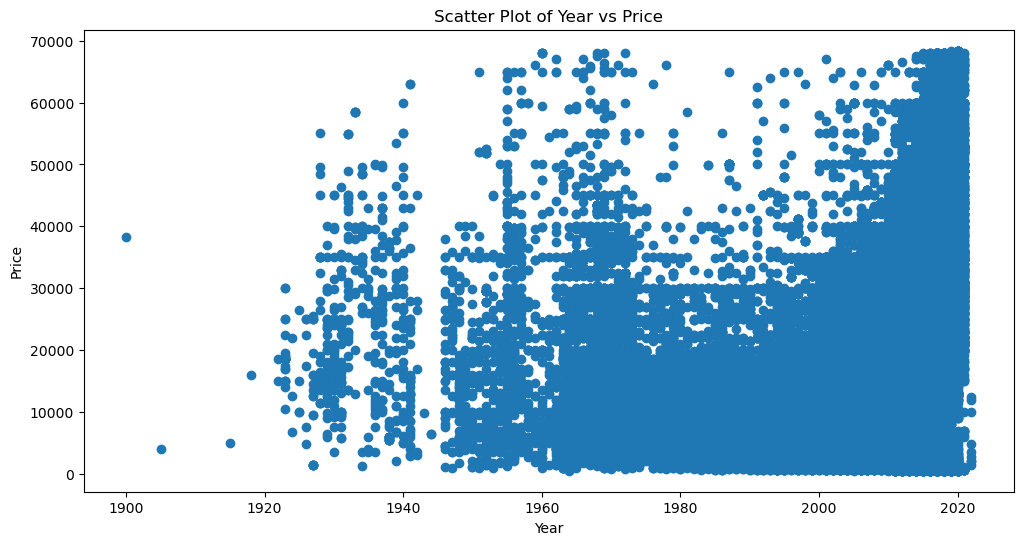

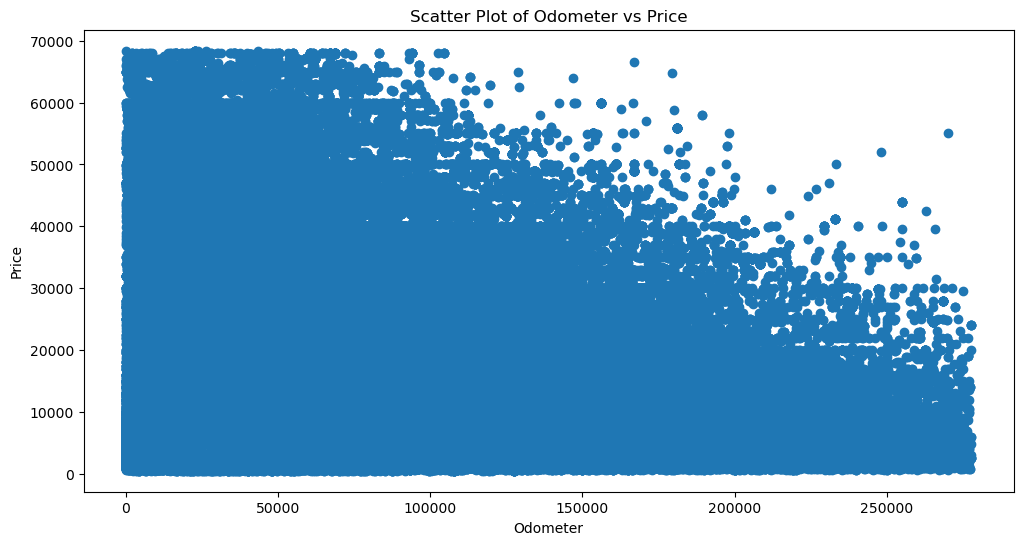

In [128]:
plt.figure(figsize=(12, 6))

# Scatter plot for year vs price
plt.scatter(df4['year'], df4['price'])
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Scatter Plot of Year vs Price')
plt.show()

plt.figure(figsize=(12, 6))

# Scatter plot for odometer vs price
plt.scatter(df4['odometer'], df4['price'])
plt.xlabel('Odometer')
plt.ylabel('Price')
plt.title('Scatter Plot of Odometer vs Price')
plt.show()

In [129]:
#Drop region, manufacturer, and year columns
df5 = df4.drop(columns=['region','state','manufacturer'])
df5.head()

,price,year,fuel,odometer,transmission,type,paint_color,bins
31,15000,2013.0,gas,128000.0,automatic,truck,black,Economy
34,35000,2019.0,gas,43000.0,automatic,truck,grey,Mid-Range
37,4500,1992.0,gas,192000.0,automatic,NaN,NaN,Economy
55,19900,2004.0,diesel,88000.0,automatic,pickup,blue,Economy
59,14000,2012.0,gas,95000.0,automatic,mini-van,silver,Economy


### Color column preparation

In [130]:
# Get a list of all unique values in 'paint_color' column
color_list = df5['paint_color'].unique().tolist()

# Display the result
print(color_list)

['black', 'grey', nan, 'blue', 'silver', 'white', 'red', 'green', 'yellow', 'brown', 'custom', 'orange', 'purple']


In [131]:
# Define the colors (3 most popular ones) to fill NaN values
colors = ['white', 'black', 'grey']

# Replace NaN values in the 'color' column with random choices from the 'colors' list
df5['paint_color'] = df5['paint_color'].apply(lambda x: np.random.choice(colors) if pd.isna(x) else x)

# Check if the code worked as intended
df5['paint_color'].isnull().sum()

0

In [132]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 277737 entries, 31 to 426874
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         277737 non-null  int64  
 1   year          277737 non-null  float64
 2   fuel          277737 non-null  object 
 3   odometer      277737 non-null  float64
 4   transmission  277737 non-null  object 
 5   type          208613 non-null  object 
 6   paint_color   277737 non-null  object 
 7   bins          275527 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.1+ MB


### Type Column Preparation 

In [133]:
# Get a list of all unique values in 'type' column
type_list = df5['type'].unique().tolist()

# Display the result
print(type_list)

['truck', nan, 'pickup', 'mini-van', 'hatchback', 'offroad', 'sedan', 'SUV', 'convertible', 'coupe', 'van', 'wagon', 'other', 'bus']


In [134]:
# Define the colors to fill NaN values
types = ['SUV', 'sedan', 'pickup']

# Replace NaN values in the 'color' column with random choices from the 'colors' list
df5['type'] = df5['type'].apply(lambda x: np.random.choice(types) if pd.isna(x) else x)

# Check if the code worked as intended
df5['type'].isnull().sum()

0

In [135]:
# Drop rows with NaN or specific values in 'title_status' column
df5 = df5[~df5['type'].isin(['other'])]

In [136]:
# Get a list of all unique values in 'type' column
type_list = df5['type'].unique().tolist()

# Display the result
print(type_list)

['truck', 'sedan', 'pickup', 'mini-van', 'hatchback', 'offroad', 'SUV', 'convertible', 'coupe', 'van', 'wagon', 'bus']


In [137]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269904 entries, 31 to 426874
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         269904 non-null  int64  
 1   year          269904 non-null  float64
 2   fuel          269904 non-null  object 
 3   odometer      269904 non-null  float64
 4   transmission  269904 non-null  object 
 5   type          269904 non-null  object 
 6   paint_color   269904 non-null  object 
 7   bins          267777 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 18.5+ MB


In [138]:
df5['bins'].isnull().sum()

2127

In [139]:
df6 = df5.dropna(subset=['bins'])
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 267777 entries, 31 to 426874
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         267777 non-null  int64  
 1   year          267777 non-null  float64
 2   fuel          267777 non-null  object 
 3   odometer      267777 non-null  float64
 4   transmission  267777 non-null  object 
 5   type          267777 non-null  object 
 6   paint_color   267777 non-null  object 
 7   bins          267777 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 18.4+ MB


In [140]:
# Convert to integer with error handling
df6['odometer'] = pd.to_numeric(df6['odometer'], errors='coerce').fillna(0).astype('int64')

# Drop the 'state' column
#df_dropped = df6.drop(columns=['state'])

C:\Users\agnek\AppData\Local\Temp\ipykernel_19540\3571363016.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['odometer'] = pd.to_numeric(df6['odometer'], errors='coerce').fillna(0).astype('int64')


In [141]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 267777 entries, 31 to 426874
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         267777 non-null  int64  
 1   year          267777 non-null  float64
 2   fuel          267777 non-null  object 
 3   odometer      267777 non-null  int64  
 4   transmission  267777 non-null  object 
 5   type          267777 non-null  object 
 6   paint_color   267777 non-null  object 
 7   bins          267777 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 18.4+ MB


### Encode Categorical Variables

In [143]:
for column in ['fuel', 'transmission', 'type', 'paint_color','bins']:
    print(f'{column}: {df6[column].nunique()} unique values')

fuel: 5 unique values
transmission: 2 unique values
type: 12 unique values
paint_color: 12 unique values
bins: 4 unique values


In [148]:
# Separate categorical columns
categorical_data = df6[['fuel', 'transmission', 'type', 'paint_color','bins']]
numerical_data = df6[['price', 'odometer','year']]

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')  # Avoid dummy variable trap

# Fit and transform the categorical columns
encoded_categorical_data = encoder.fit_transform(categorical_data)

# Combine the transformed categorical data with numerical data
final_data = pd.concat([
    pd.DataFrame(encoded_categorical_data, columns=encoder.get_feature_names(categorical_data.columns)),
    numerical_data
], axis=1)

final_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 366596 entries, 0 to 426874
Data columns (total 33 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   fuel_electric        267777 non-null  float64
 1   fuel_gas             267777 non-null  float64
 2   fuel_hybrid          267777 non-null  float64
 3   fuel_other           267777 non-null  float64
 4   transmission_manual  267777 non-null  float64
 5   type_bus             267777 non-null  float64
 6   type_convertible     267777 non-null  float64
 7   type_coupe           267777 non-null  float64
 8   type_hatchback       267777 non-null  float64
 9   type_mini-van        267777 non-null  float64
 10  type_offroad         267777 non-null  float64
 11  type_pickup          267777 non-null  float64
 12  type_sedan           267777 non-null  float64
 13  type_truck           267777 non-null  float64
 14  type_van             267777 non-null  float64
 15  type_wagon       

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


<span style="color:red; font-size:25px;">MODELING</span>

In [150]:
# Replace infinity values with NaN
final_data.replace([float('inf'), -float('inf')], pd.NA, inplace=True)

# Then handle NaNs as described above
final_data = final_data.dropna()

### Linear Regression Model 

In [151]:
# Separate features and target
X = final_data.drop(columns=['price'])
y = final_data['price']

# Apply log transformation to the target variable
y_log = np.log(y + 1)  # Adding 1 to handle zero values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_log = model.predict(X_test_scaled)

# Reverse the log transformation for predictions
y_pred = np.exp(y_pred_log) - 1  # Reverse the log transformation

# Reverse the log transformation for the true values in the test set
y_test_actual = np.exp(y_test) - 1

# Evaluate the model
print("Mean Squared Error:", mean_squared_error(y_test_actual, y_pred))
print("R^2 Score:", r2_score(y_test_actual, y_pred))

# Optionally, print model coefficients for interpretation
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

Mean Squared Error: 113213816.58822648
R^2 Score: 0.2996647343962816
                     Coefficient
fuel_electric          -0.002752
fuel_gas                0.004482
fuel_hybrid             0.002549
fuel_other              0.002624
transmission_manual    -0.001788
type_bus                0.000466
type_convertible       -0.000873
type_coupe              0.002958
type_hatchback          0.000991
type_mini-van           0.002967
type_offroad            0.004399
type_pickup             0.003348
type_sedan              0.001561
type_truck             -0.004967
type_van               -0.001097
type_wagon             -0.001057
paint_color_blue       -0.004088
paint_color_brown      -0.000336
paint_color_custom     -0.000602
paint_color_green      -0.001662
paint_color_grey       -0.000390
paint_color_orange     -0.000926
paint_color_purple     -0.000441
paint_color_red        -0.000974
paint_color_silver      0.001554
paint_color_white       0.002679
paint_color_yellow      0.000581
bins_Lu

#### MSE
The metrics for the model show a Mean Squared Error (MSE) of 113,213,816.59 and an R^2 Score of 0.30. The MSE indicates the average squared difference between the predicted and actual values, with a higher value suggesting larger discrepancies in predictions. In this case, the relatively high MSE suggests that the model's predictions are not very close to the actual values.

#### R^2
The R^2 Score, which measures the proportion of the variance in the target variable that is predictable from the features, is 0.30. This means that only 30% of the variance in the target variable is explained by the model, indicating a modest fit. A higher R^2 Score would imply that the model is better at capturing the variability in the data.

Overall, these metrics suggest that while the model captures some of the variance in the data, there is significant room for improvement. The model may benefit from additional feature engineering, data preprocessing, or exploring more sophisticated algorithms to improve its predictive performance.

### Ridge Regression Model with Standardization

Ridge simple cross validation Train MSE: 0.45932914793122903
Ridge simple cross validation Test MSE: 0.4576708187744008
Best Ridge Alpha: {'regressor__alpha': 100}


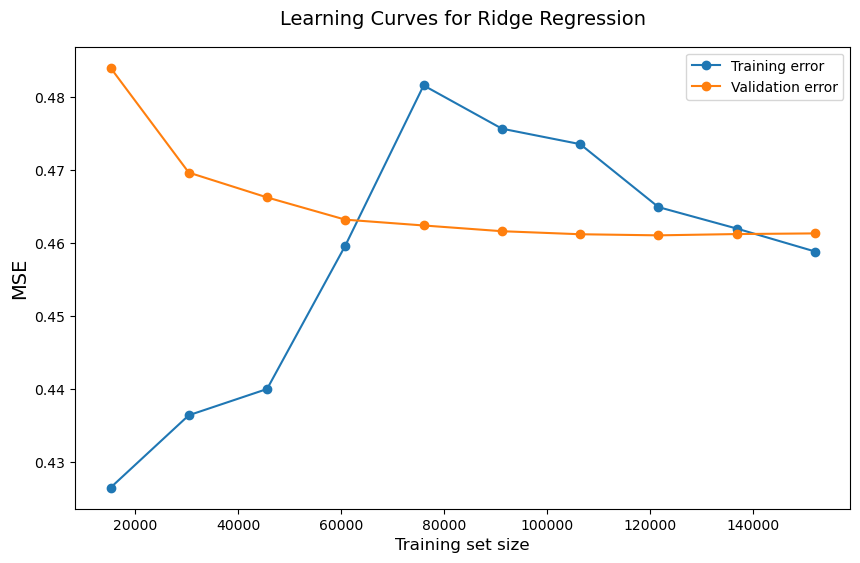

In [153]:
# Separate features and target
X = final_data.drop(columns=['price'])
y = final_data['price']

# Apply log transformation to the target variable
y_log = np.log(y + 1)  # Adding 1 to handle zero values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)

# Initialize the scaler
scaler = StandardScaler()

# Define the Ridge model
ridge = Ridge()

# Create a pipeline that first scales the data and then applies Ridge regression
pipeline = Pipeline([
    ('scaler', scaler),
    ('regressor', ridge)
])

# Define the parameter grid for Ridge
param_grid = {'regressor__alpha': [0.1, 1, 10, 100]}

# Set up GridSearchCV
ridge_grid = GridSearchCV(pipeline, param_grid, cv=10, scoring='neg_mean_squared_error')

# Fit the GridSearchCV
ridge_grid.fit(X_train, y_train)

# Best estimator
best_ridge_model = ridge_grid.best_estimator_

# Predict on train and test sets
y_train_pred = best_ridge_model.predict(X_train)
y_test_pred = best_ridge_model.predict(X_test)

# Compute MSE for train and test sets
ridge_train_mse = mean_squared_error(y_train, y_train_pred)
ridge_test_mse = mean_squared_error(y_test, y_test_pred)

# Print metrics
print(f"Ridge simple cross validation Train MSE: {ridge_train_mse}")
print(f"Ridge simple cross validation Test MSE: {ridge_test_mse}")
print(f"Best Ridge Alpha: {ridge_grid.best_params_}")

# Plot learning curves
train_sizes, train_scores, validation_scores = learning_curve(
    best_ridge_model, X, y_log, cv=10, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Compute mean and standard deviation of training and validation scores
train_scores_mean = -train_scores.mean(axis=1)
validation_scores_mean = -validation_scores.mean(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training error', marker='o')
plt.plot(train_sizes, validation_scores_mean, label='Validation error', marker='o')
plt.ylabel('MSE', fontsize=14)
plt.xlabel('Training set size', fontsize=12)
plt.title('Learning Curves for Ridge Regression', fontsize=14, y=1.03)
plt.legend()
plt.savefig('k-fold-lcurve.jpeg', bbox_inches='tight')
plt.show()

#### Train MSE (Mean Squared Error): 0.4593

This value represents the average squared difference between the predicted values and the actual values on the training set. A lower value indicates better performance, but it is important to compare it with the test MSE to assess if the model is overfitting.

#### Test MSE: 0.4577

This value indicates the average squared difference between the predicted values and the actual values on the test set. The fact that the test MSE is very close to the train MSE suggests that the model is generalizing well and not overfitting.

#### Best Ridge Alpha: 100

The best alpha parameter found during grid search is 100. This indicates that the optimal amount of regularization for this Ridge regression model is relatively high. A high alpha value suggests that the model is penalizing the size of the coefficients more heavily to avoid overfitting.

#### Summary

The close values of train and test MSEs suggest that the Ridge regression model has a good balance between bias and variance and is generalizing well to unseen data.
The high alpha value (100) indicates strong regularization, which is likely helping to prevent overfitting by shrinking the coefficients and simplifying the model.

In [154]:
# Best estimator from GridSearchCV
best_ridge_model = ridge_grid.best_estimator_

# Retrieve the Ridge model from the pipeline
ridge_model = best_ridge_model.named_steps['regressor']

# Get feature names from the scaler and encoder
# If you have transformed feature names from encoding, you need to include them here
# Otherwise, just use the original feature names
feature_names = X.columns  # Adjust this if your features have been transformed

# Retrieve the coefficients from the Ridge model
coefficients = ridge_model.coef_

# Create a DataFrame to display the coefficients
coefficients_df = pd.DataFrame(coefficients, index=feature_names, columns=['Coefficient'])

# Print or display the coefficients DataFrame
print(coefficients_df)

                     Coefficient
fuel_electric          -0.002751
fuel_gas                0.004477
fuel_hybrid             0.002546
fuel_other              0.002620
transmission_manual    -0.001786
type_bus                0.000464
type_convertible       -0.000872
type_coupe              0.002954
type_hatchback          0.000988
type_mini-van           0.002964
type_offroad            0.004397
type_pickup             0.003346
type_sedan              0.001558
type_truck             -0.004966
type_van               -0.001096
type_wagon             -0.001060
paint_color_blue       -0.004086
paint_color_brown      -0.000336
paint_color_custom     -0.000601
paint_color_green      -0.001661
paint_color_grey       -0.000390
paint_color_orange     -0.000927
paint_color_purple     -0.000440
paint_color_red        -0.000974
paint_color_silver      0.001551
paint_color_white       0.002675
paint_color_yellow      0.000581
bins_Luxury            -0.000866
bins_Mid-Range         -0.001205
bins_Ultra

<span style="color:red; font-size:25px;">CONCLUSION</span>


### Price drivers: 

#### Manufacturing year and mileage

The modeling process involved applying linear regression with a log-transformed target variable, 'price,' to address the right-skewed distribution. However, this approach yielded a suboptimal performance with a score as low as 0.29. An alternative modeling approach demonstrated improved metrics and highlighted two primary drivers of car prices: the year of manufacture, where newer years correlated with higher prices, and odometer readings, where higher mileage led to lower prices. Features such as color, type, and transmission did not show a significant impact on used car prices.

### Data Issues

Despite the original dataset containing 426,880 records, many attributes had incomplete or erroneous data, which compromised the overall data quality. After removing incomplete records and normalizing the remaining data, the dataset was reduced to 267,777 records. Due to time constraints, further investigation into the missing data was not possible. To ensure accurate predictions and effective model development, it is essential to have a robust and high-quality dataset.

### Recommendations 

Acquire more newer cars, as the year of production positively influences the price of used cars. For older vehicles, focus on the mileage, as it significantly negatively impacts the car's price.

Invest in obtaining a cleaner dataset or enhancing the quality of the existing data. Conduct thorough research to understand the relationship between attributes to guide data cleaning efforts.

Address anomalies in the dataset, such as prices ranging from 0 to exceeding 5 million, as these indicate data quality issues.Setting in constrains on values upon data entry could be one of the many solutions to help avoid extreme values. 
